In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN', , 'NAME', 'STATUS' and 'SPECIAL_CONSIDERATIONS'.
application_df= application_df.drop(['EIN', 'NAME', 'STATUS','SPECIAL_CONSIDERATIONS'],1)
application_df.head()

/var/folders/lr/fx535nnd0_s26n_5cs4kvpjr0000gn/T/ipykernel_24510/275423930.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df= application_df.drop(['EIN', 'NAME', 'STATUS','SPECIAL_CONSIDERATIONS'],1)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at INCOME_AMT value counts for binning
income_amt_counts = application_df.INCOME_AMT.value_counts()
income_amt_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

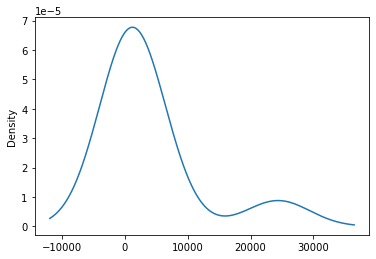

In [5]:
# Visualize the value counts of INCOME_AMT
income_amt_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_income_amt = list(income_amt_counts[income_amt_counts < 100].index)

# Replace in dataframe
for app in replace_income_amt:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [7]:
# Look at ASK_AMT value counts for binning
ask_amt_counts = application_df.ASK_AMT.value_counts()
ask_amt_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

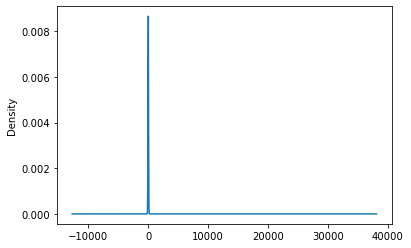

In [8]:
# Visualize the value counts of ASK_AMT
ask_amt_counts.plot.density()

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

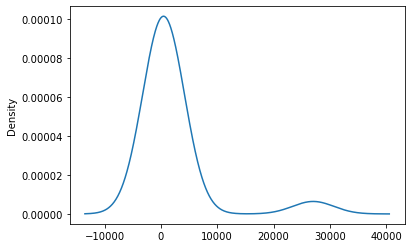

In [10]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

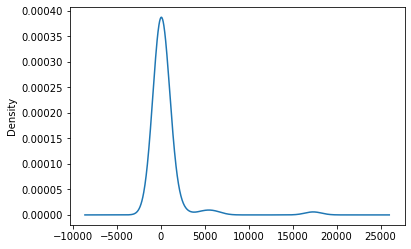

In [12]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(columns = application_cat)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Additional neurons to a hidden layer

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4900      
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7,961
Trainable params: 7,961
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_neurons/",exist_ok=True)
checkpoint_path = "checkpoints_optimization_neurons/weights.{epoch:02d}.hdf5"

In [22]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 5s 4ms/step - loss: 0.5712 - accuracy: 0.7224
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5565 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5524 - accuracy: 0.7331
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5511 - accuracy: 0.7327
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7327
Epoch 5: saving model to checkpoints_optimization_neurons/weights.05.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5500 - accuracy: 0.7325
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5488 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.7339
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7338
Epoch 9/100
804/804 [============

804/804 [==============================] - 2s 3ms/step - loss: 0.5378 - accuracy: 0.7402
Epoch 62/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5380 - accuracy: 0.7401
Epoch 63/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5378 - accuracy: 0.7402
Epoch 64/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5378 - accuracy: 0.7406
Epoch 65/100
790/804 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.7406
Epoch 65: saving model to checkpoints_optimization_neurons/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5374 - accuracy: 0.7409
Epoch 66/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5374 - accuracy: 0.7402
Epoch 67/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5375 - accuracy: 0.7402
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5372 - accuracy: 0.7405
Epoch 69/100
804/804 [===============

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5561 - accuracy: 0.7257 - 775ms/epoch - 3ms/step
Loss: 0.5561254024505615, Accuracy: 0.7257142663002014


In [24]:
# Additional hidden layers are added

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
nodes_hidden_layer3 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3920      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_layers/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_layers/weights.{epoch:02d}hdf5"

In [27]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5719 - accuracy: 0.7233
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5517 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5504 - accuracy: 0.7331
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5495 - accuracy: 0.7332
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5480 - accuracy: 0.7340
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5480 - accuracy: 0.7341
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5469 - accuracy: 0.7343
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5466 - accuracy: 0.7351
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5466 - accura

804/804 [==============================] - 4s 4ms/step - loss: 0.5371 - accuracy: 0.7401
Epoch 81/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5366 - accuracy: 0.7407
Epoch 82/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5369 - accuracy: 0.7404
Epoch 83/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5363 - accuracy: 0.7409
Epoch 84/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7401
Epoch 85/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5363 - accuracy: 0.7400
Epoch 86/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5368 - accuracy: 0.7404
Epoch 87/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5366 - accuracy: 0.7400
Epoch 88/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5361 - accuracy: 0.7403
Epoch 89/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5362 - accuracy: 

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5567 - accuracy: 0.7257 - 688ms/epoch - 3ms/step
Loss: 0.5566739439964294, Accuracy: 0.7257142663002014


In [29]:
# The activation function of hidden layers or output layers is changed for optimization
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="tanh", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3920      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,381
Trainable params: 6,381
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_change/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_change/weights.{epoch:02d}hdf5"

In [32]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5730 - accuracy: 0.7198
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5562 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5528 - accuracy: 0.7302
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5505 - accuracy: 0.7314
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5495 - accuracy: 0.7325
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5487 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.7343
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5464 - accuracy: 0.7354
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5460 - accuracy: 0.7347
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5457 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7415
Epoch 81/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.7423
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5336 - accuracy: 0.7417
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7423
Epoch 84/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7418
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7423
Epoch 86/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5333 - accuracy: 0.7422
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7420
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5329 - accuracy: 0.7417
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5532 - accuracy: 0.7254 - 538ms/epoch - 2ms/step
Loss: 0.5532349944114685, Accuracy: 0.7253644466400146


In [35]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation.h5")